In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from scipy.io import loadmat

# plot old log file on server 53, can not run on server 44

**load all datafile**

In [64]:
env = ["pusher", "reacher", "halfcheetah"]
algo = ["PETS", "POPLINA_INIT", "POPLINA_REPLAN", "POPLINP_BC", "POPLINP_AVG"] 

all_file_list = glob.glob(os.path.join(os.getcwd(),'log/*/*/logs.mat'))
print(len(all_file_list))

45


**Eaxmple plot with one algo and one env**

Concatenate all random seeds, and concert to DataFrame
 (3, 50) 
            0           1           2           3           4           5   \
0 -167.971610 -159.240237 -219.614834 -213.779293 -181.962452 -172.442095   
1 -164.980789 -191.979808 -180.852294 -133.175099 -128.802440 -174.875443   
2 -183.249846 -352.231994 -148.763291 -130.717456 -146.644812 -136.313813   

           6           7           8           9   ...          40  \
0 -113.722766 -139.858375 -130.680886 -129.246161  ...  -99.260255   
1 -121.191207 -114.156978 -154.233417 -145.193985  ... -187.720754   
2 -160.239154 -113.195947 -126.943302  -97.843803  ...  -70.706623   

           41          42          43         44         45         46  \
0  -93.791558  -93.955026  -98.860928 -88.760802 -90.034155 -92.888979   
1 -103.252770 -141.509719  -93.804785 -95.796350 -58.266635 -89.696173   
2  -99.086193  -69.418435 -131.796291 -62.804593 -64.287832 -70.054782   

          47          48          49  
0 -89.96

Text(0.5, 1.0, 'POPLINA_INIT_pusher')

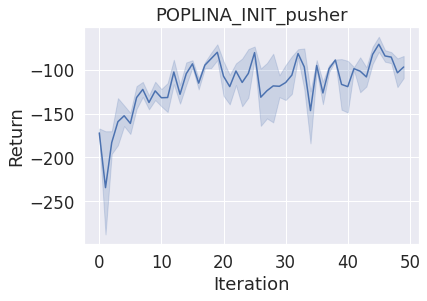

In [59]:
sns.set(style="darkgrid", font_scale=1.5)

file_list = [name for name in all_file_list if "pusher" in name]
file_list = [name for name in file_list if "POPLINA_INIT" in name]
# print(env[j], algo[i], len(file_list))

# loading all random seeds results
data = []
for name in file_list:
    returns = loadmat(name)['returns']
    data.append(returns)

# concat along first dim, convert to DF 
data = np.concatenate(data,axis=0)
data = pd.DataFrame(data) 
print("Concatenate all random seeds, and concert to DataFrame\n", data.shape, "\n",data) # (3, 50)
data = data.melt(var_name="Iteration", value_name="Return") # (150,2)
print("Using melt unpivoit column to row \n", data.shape, "\n", data)

# plot
sns.lineplot(x="Iteration", y="Return", data=data, ci=68)
plt.title("POPLINA_INIT_pusher")

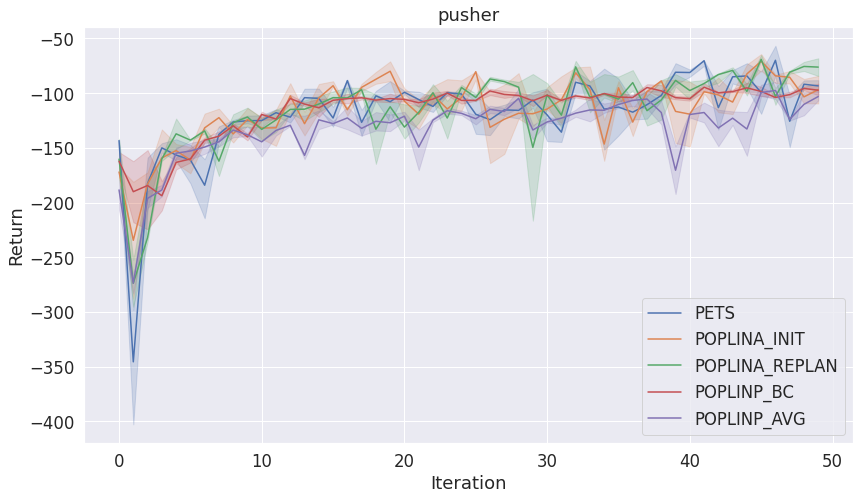

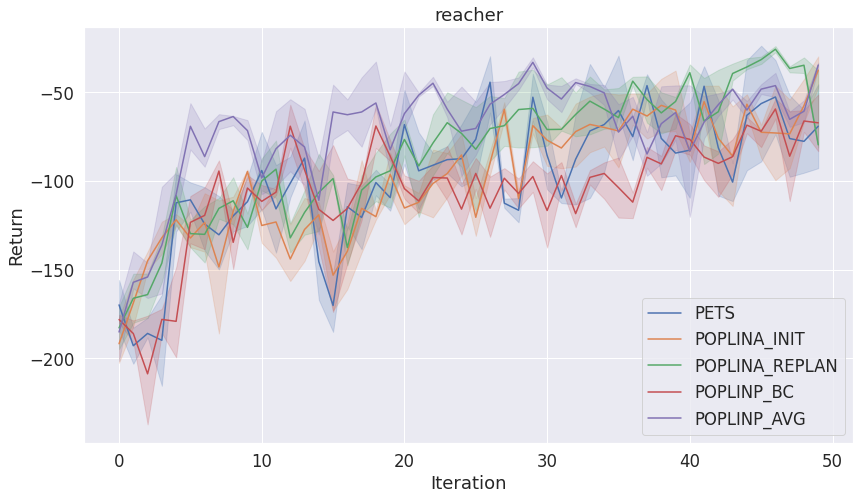

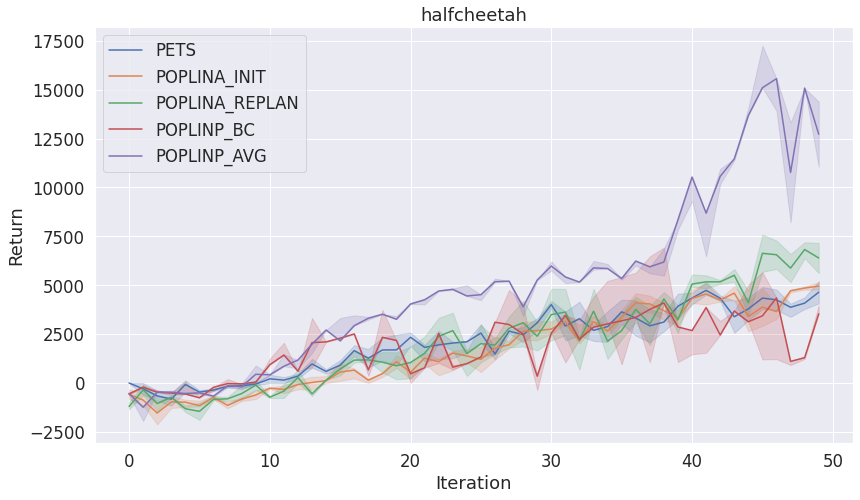

In [63]:
sns.set(style="darkgrid", font_scale=1.5)

for j in range(len(env)):
    fig = plt.figure(figsize=(12,7))
    for i in range(len(algo)):
        file_list = [name for name in all_file_list if env[j] in name]
        file_list = [name for name in file_list if algo[i] in name]
        data = []
        # print(env[j], algo[i], len(file_list))
        for name in file_list:
            returns = loadmat(name)['returns']
            data.append(returns)
        data = np.concatenate(data,axis=0)
        data = pd.DataFrame(data).melt()
        sns.lineplot(x="variable", y="value", data=data, label=algo[i],ci=50)
    plt.title(env[j])
    plt.legend(loc='best')
    plt.tight_layout(pad=0.5)
    plt.xlabel("Iteration")
    plt.ylabel("Return")
    plt.show()

# plot log on server 44

## horizon experiments
load all experiments .mat

file_path = log/horizon_exp/POPLINP_AVG_Cheetah/hxxx/datexxx/logs.mat

In [2]:
all_file_list = glob.glob(os.path.join(os.getcwd(),'log/horizon_exp/POPLINP_AVG_Cheetah/*/*/logs.mat'))
# 5 horizon * 3 random seeds = 15 experiments
print(len(all_file_list))

16


example plot with one horizon length

Concatenate all random seeds, and concert to DataFrame
 (3, 200) 
            0            1            2           3            4    \
0  -396.236791 -2578.872926  -317.410279 -201.820152  -982.751136   
1 -1122.006208  -315.228038  -235.880645 -489.611967 -1594.573109   
2  -744.925991  -773.084468 -2381.583832 -238.718081 -2938.098091   

           5           6           7           8           9    ...  \
0  -605.165808 -810.919494 -491.038689 -447.332799 -421.798967  ...   
1  -537.056555 -669.343948 -532.775892 -367.231613 -188.434817  ...   
2 -1027.247133 -632.434925 -784.693730  226.077653 -145.910940  ...   

           190          191          192          193          194  \
0  2101.987566  2094.464062  2112.076225  2143.907748  2115.693254   
1  2092.712289  2061.546898  2097.659444  2166.770436  2129.042925   
2  2072.261619  2096.250213  2176.250827  2061.569622  2073.645245   

           195          196          197          198          199  
0  2105.632019  2099.

Text(0.5, 1.0, 'POPLINP_AVG_Cheetah')

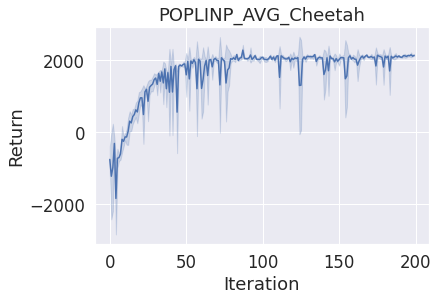

In [3]:
sns.set(style="darkgrid", font_scale=1.5)

file_list = [name for name in all_file_list if "h10" in name]

data = []
for name in file_list:
    returns = loadmat(name)['returns']
    data.append(returns)
    
# concat along first dim, convert to DF 
data = np.concatenate(data,axis=0)
data = pd.DataFrame(data) 
print("Concatenate all random seeds, and concert to DataFrame\n", data.shape, "\n",data) # (3, 200)

data = data.melt(var_name="Iteration", value_name="Return") # (600,2)
print("Using melt unpivoit column to row \n", data.shape, "\n", data)

# plot
sns.lineplot(x="Iteration", y="Return", data=data, ci='sd')
plt.title("POPLINP_AVG_Cheetah")

different horizon in one plot

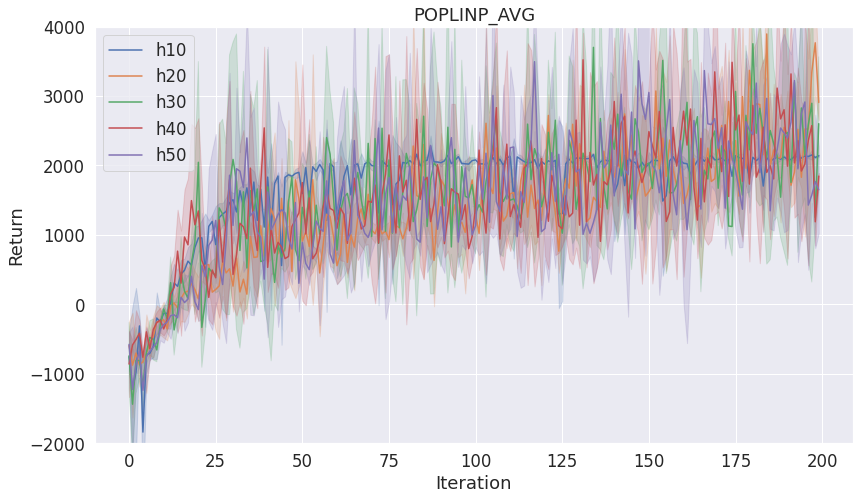

In [20]:
sns.set(style="darkgrid", font_scale=1.5)
horizon = ['h10', 'h20', 'h30', 'h40', 'h50']
last_val = []

fig = plt.figure(figsize=(12,7))
for i in range(len(horizon)):
    file_list = [name for name in all_file_list if horizon[i] in name]
    data = []
    for name in file_list:
        returns = loadmat(name)['returns']
        data.append(returns)
    data = np.concatenate(data,axis=0)
    # data = data[:,::25]
    ############################running average##########################
    data = pd.DataFrame(data)
    N = 1
    data = data.rolling(window=N, axis=1).mean().iloc[:,N-1:].values
    last_val.append(data[:, -1])
    data = pd.DataFrame(data)
    #####################################################################
    data = pd.DataFrame(data).melt()
    sns.lineplot(x="variable", y="value", data=data, label=horizon[i], ci='sd')
plt.title('POPLINP_AVG')
plt.legend(loc='best')
plt.tight_layout(pad=0.5)
plt.xlabel("Iteration")
plt.ylabel("Return")
plt.ylim(-2000, 4000)
plt.savefig('planning_horizon.png')
plt.show()

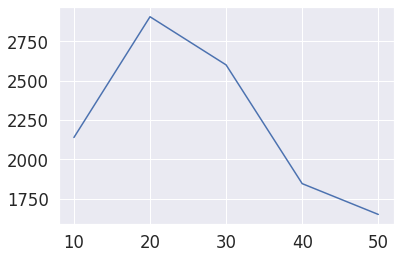

In [21]:
last_val_mean = [np.mean(val) for val in last_val]
plt.plot(np.arange(1,6,1) * 10, last_val_mean)

different horizon in 5 plot

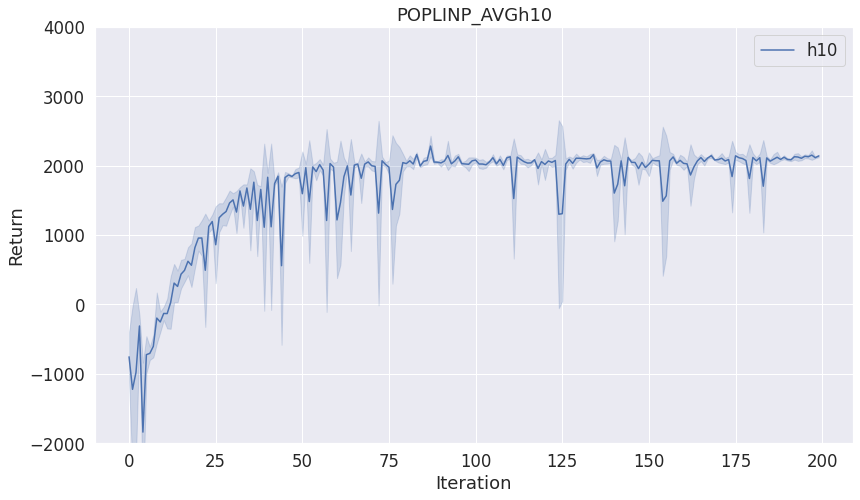

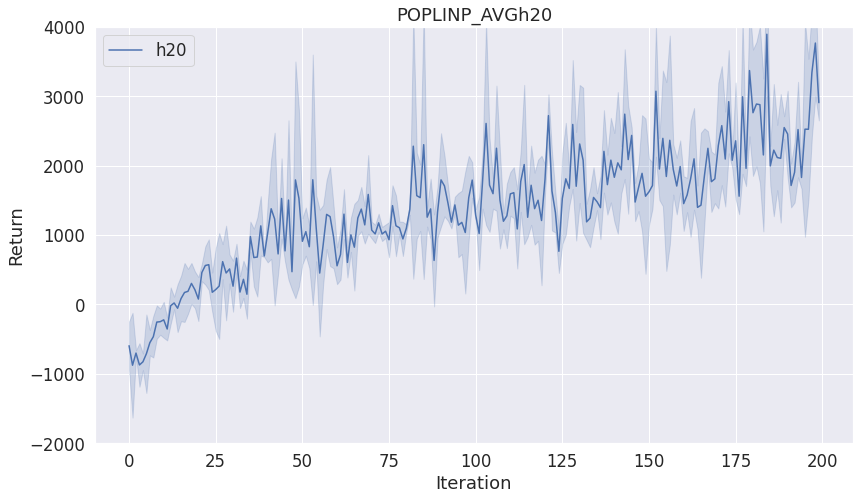

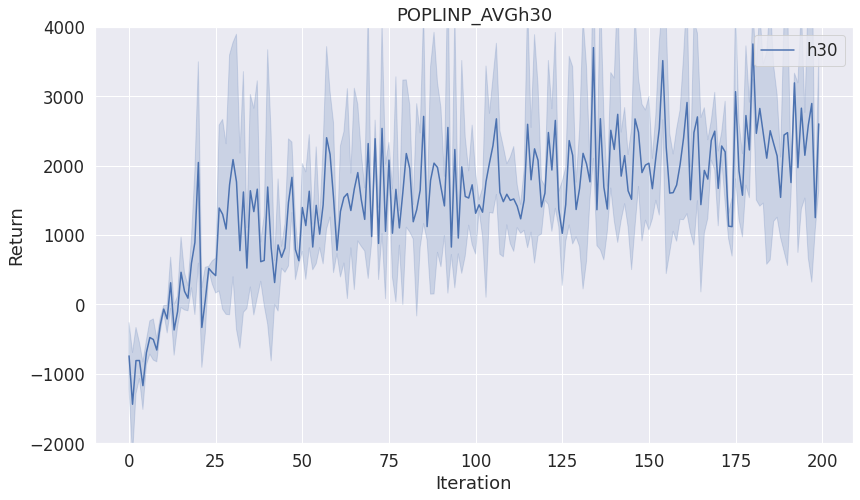

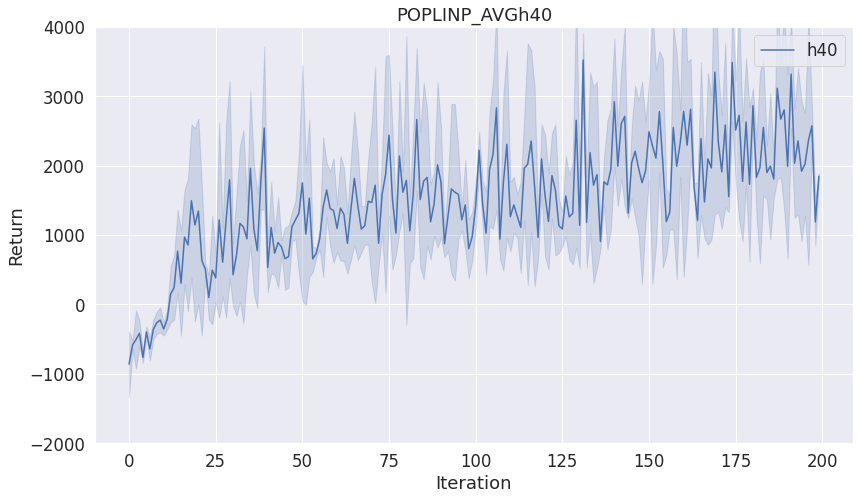

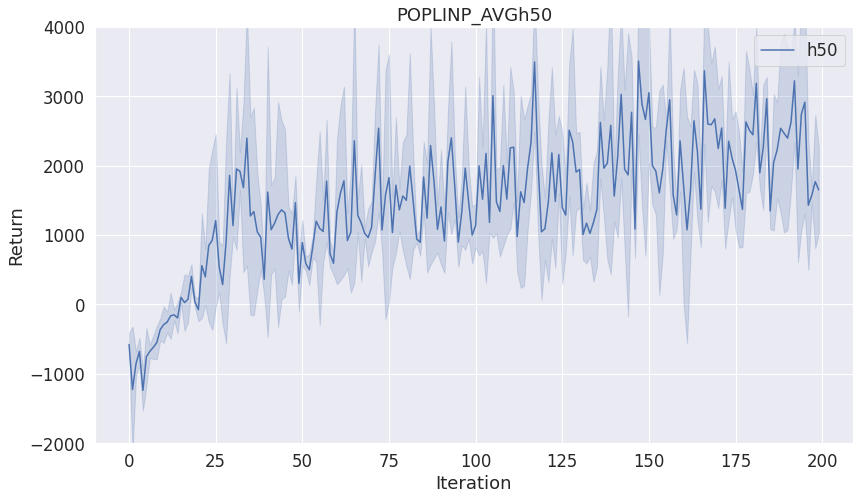

In [10]:
sns.set(style="darkgrid", font_scale=1.5)
horizon = ['h10', 'h20', 'h30', 'h40', 'h50']


for i in range(len(horizon)):
    fig = plt.figure(figsize=(12,7))
    file_list = [name for name in all_file_list if horizon[i] in name]
    data = []
    for name in file_list:
        returns = loadmat(name)['returns']
        data.append(returns)
    data = np.concatenate(data,axis=0)
#     data = pd.DataFrame(data)
#     N = 5
#     data = data.rolling(window=N, axis=1).mean().iloc[:,N-1:].values
#     last_val.append(data[:, -1])
#     data = pd.DataFrame(data)
    data = pd.DataFrame(data).melt()
    sns.lineplot(x="variable", y="value", data=data, label=horizon[i],ci='sd')
    plt.title('POPLINP_AVG' + horizon[i])
    plt.legend(loc='best')
    plt.tight_layout(pad=0.5)
    plt.xlabel("Iteration")
    plt.ylabel("Return")
    plt.ylim(-2000, 4000)
    plt.show()

smooth data for clearness

No handles with labels found to put in legend.


Concatenate all random seeds, and concert to DataFrame
 (3, 200) 
           0            1            2           3            4            5    \
0 -389.241122  -700.081828 -1050.018768 -640.624964 -1253.914036  -828.683027   
1 -604.021561  -703.780239  -805.684649 -500.056621 -1520.087652  -305.916058   
2 -735.639086 -2269.243333  -707.603892 -886.067637  -936.583962 -1126.129836   

          6           7           8           9    ...          190  \
0 -764.661741 -763.518855 -782.827991 -407.461678  ...  3623.590113   
1 -680.851334 -654.773819 -309.389942 -185.637310  ...  2573.828961   
2 -577.948499 -434.349398 -555.836265 -488.380025  ...   991.644458   

           191          192          193          194          195  \
0  2486.207900  3830.660796  3467.610763  2924.745165  3914.418691   
1  1716.473022  3618.329610  1467.407891   992.387097  3765.939251   
2  3661.580769  2216.897173   917.245533  4315.695590  1062.362144   

           196          197          198  

(-2000.0, 4000.0)

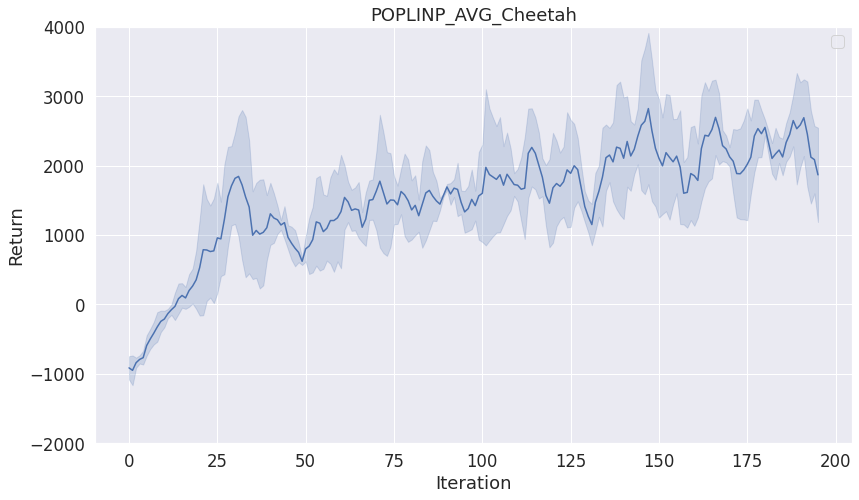

In [61]:
sns.set(style="darkgrid", font_scale=1.5)

file_list = [name for name in all_file_list if "h50" in name]

data = []
for name in file_list:
    returns = loadmat(name)['returns']
    data.append(returns)
    
# concat along first dim, convert to DF 
data = np.concatenate(data,axis=0)
data = pd.DataFrame(data) 
print("Concatenate all random seeds, and concert to DataFrame\n", data.shape, "\n",data,"\n\n") # (3, 200)



N = 5
data = data.rolling(window=N, axis=1).mean().iloc[:,N-1:].values
print("Running avg with window %d\n"%N, data.shape, "\n") # (3, 200)

data = pd.DataFrame(data)
data = data.melt(var_name="Iteration", value_name="Return") # (600,2)
print("Using melt unpivoit column to row \n", data.shape, "\n", data)

# plot
fig = plt.figure(figsize=(12,7))
sns.lineplot(x="Iteration", y="Return", data=data, ci='sd')
plt.title("POPLINP_AVG_Cheetah")
plt.legend(loc='best')
plt.tight_layout(pad=0.5)
plt.xlabel("Iteration")
plt.ylabel("Return")
plt.ylim(-2000, 4000)

In [94]:
a = 'none'

if a is not None and a is not "none":
    print('not None and not \'none\'')

## Poplulation Size

In [3]:
all_file_list = glob.glob(os.path.join(os.getcwd(),'log/popsize_exp/POPLINP_AVG_Cheetah/*/*/logs.mat'))
# 5 horizon * 3 random seeds = 15 experiments
print(len(all_file_list))

5


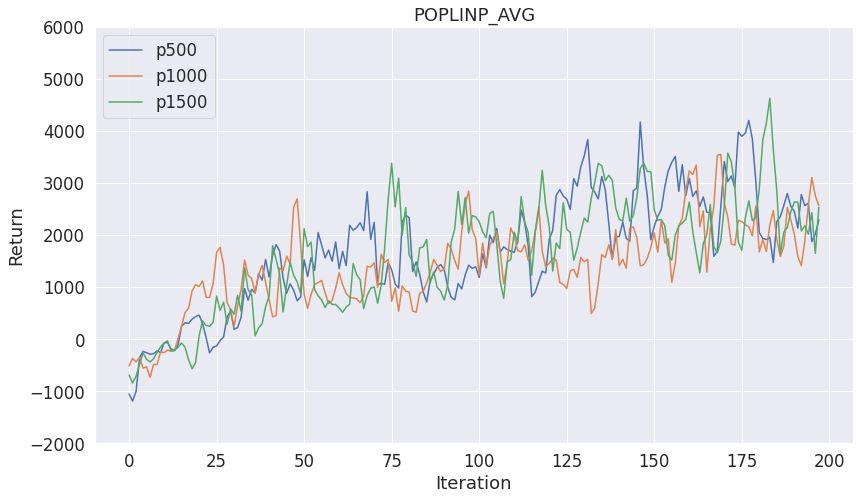

In [14]:
sns.set(style="darkgrid", font_scale=1.5)
horizon = ['p500', 'p1000', 'p1500']
last_val = []

fig = plt.figure(figsize=(12,7))
for i in range(len(horizon)):
    file_list = [name for name in all_file_list if horizon[i] in name]
    data = []
    for name in file_list:
        returns = loadmat(name)['returns']
        data.append(returns)
    data = np.concatenate(data,axis=0)
    # data = data[:,::25]
    ############################running average##########################
    data = pd.DataFrame(data)
    N = 3
    data = data.rolling(window=N, axis=1).mean().iloc[:,N-1:].values
    last_val.append(data[:, -1])
    data = pd.DataFrame(data)
    #####################################################################
    data = pd.DataFrame(data).melt()
    sns.lineplot(x="variable", y="value", data=data, label=horizon[i], ci='sd')
plt.title('POPLINP_AVG')
plt.legend(loc='best')
plt.tight_layout(pad=0.5)
plt.xlabel("Iteration")
plt.ylabel("Return")
plt.ylim(-2000, 6000)
plt.savefig('pop_size.png')
plt.show()